### Introduction:

In week 5 journal entry, I have attempted to solve exercises from think bayes chapter 2,3 and 4. The data for the questions are based on the problem being discussed.

The implemented solutions are both a mix of think bayes notations as well as generic functions.

In [213]:
# Importing the libaries
from __future__ import print_function, division

% matplotlib inline
import thinkbayes2
from thinkbayes2 import Hist, Pmf, Suite, Beta
import thinkplot

**Exercise 2.1**  

In Section 2.3, I said that the solution to the cookie problem generalizes to the case where we draw multiple cookies with replacement.
But in the more likely scenario where we eat the cookies we draw, the likelihood of each draw depends on the previous draws.
Modify the solution in this chapter to handle selection without replacement. Hint: add instance variables to Cookie to represent the hypothetical state of the bowls, and modify Likelihood accordingly. You might want to define a Bowl object.


**Solution**

#### Case 1: Sampling with replacement

There are two bowls Bowl1 and Bowl2. Bowl1 contains 30 vanilla and 20 chocolate cookies. The following section defines a Hist object (defined in thinkbayes) to keep track of cookies in each bowl.

In [150]:
# Define a Hist object to keep track of cookies in each bowl
Bowl1 = Hist(dict(vanilla=30,chocolate=10))
Bowl2 = Hist(dict(vanilla=20,chocolate=20))
Bowl1.Print()
Bowl2.Print()

chocolate 10
vanilla 30
chocolate 20
vanilla 20


Let's make a probability mass function with two bowls giving them equal probability. So, the prior probability of both are equal initially.

In [151]:
# Pmf for two bowls
pmf = Pmf([Bowl1,Bowl2])
pmf.Print()

Hist({'vanilla': 30, 'chocolate': 10}) 0.5
Hist({'vanilla': 20, 'chocolate': 20}) 0.5


According to Bayes theorem: 

Posterior = [Prior * Likelihood] / [Normalizing Constant]

eg : Probability of Bowl1 given one has picked up vanilla cookie can be calculated as:

P ( Bowl1 | Vanilla ) = [ P( Bowl1 ) * P( Vanilla | Bowl1 ) ] / [ P( Vanilla ) ]

where, 
  + P ( Bowl1 | Vanilla ) = posterior
  + P( Bowl1 ) = Prior for Bowl1
  + P( Vanilla | Bowl1 ) = Likelihood
  + P( Vanilla ) = Normaliing constant


The following likehood function calculates the likelihood. The update function calculates the posterior by updating prior(multiplying prior by likelihood) and dividing the results by normalizing constant.

Also, one thing to take note over here is the calculated posterior becomes the prior for the next draw from that bowl.


In [152]:
# Likelihood (like) is calculated as no. of vanilla or chocolate cookie(What ever is being picked)/total no. of cookies in that bowl
def Likelihood(hypothesis,data):
    like = hypothesis[data]/hypothesis.Total()
    return like


# sampling with replacement 
def update(pmf, data):
    for hypothesis in pmf:
        
        pmf[hypothesis] *=Likelihood(hypothesis,data) # Update the prior and divide the 
        
    return pmf.Normalize()


In [153]:
#Sampling with replacement: Probability of picking vanilla cookie from bow11 and bowl2
update(pmf,'vanilla')
pmf.Print()

Hist({'vanilla': 30, 'chocolate': 10}) 0.6
Hist({'vanilla': 20, 'chocolate': 20}) 0.4


In the first draw the probability of drawing a vanilla cookie from Bowl1 is 0.6 and Bowl2 is 0.4.

In [154]:
#Sampling with replacement: Probability of picking vanilla cookie from bowl1 and bowl2
update(pmf,'vanilla')
pmf.Print()

Hist({'vanilla': 30, 'chocolate': 10}) 0.692307692308
Hist({'vanilla': 20, 'chocolate': 20}) 0.307692307692


In the first draw the probability of drawing a vanilla cookie from Bowl1 become 0.692 and Bowl2 becomes 0.307. This is a sampling witout replacement case but one thing to take note over here is the calculated posterior becomes the prior for the next draw from that bowl. This is because we are updating our belief in the system.


In [155]:
#Sampling with replacement: Probability of picking vanilla cookie from bowl1 and bowl2
update(pmf,'vanilla')
pmf.Print()

Hist({'vanilla': 30, 'chocolate': 10}) 0.771428571429
Hist({'vanilla': 20, 'chocolate': 20}) 0.228571428571


Again in the next draw the probability of drawing a vanilla cookied from Bowl1 becomes 0.77 and from Bowl2 becomes 0.22 because of regular updation of belief(prior) upon every draw.

The same example can work for drawing chocolate cookie as well

#### Case2: Sampling without replacement


There are two bowls B1 and B2. B1 contains 30 vanilla and 20 chocolate cookies. B2 contains equal no. of both cookies(20 and 20). The following section defines a Hist object (defined in thinkbayes) to keep track of cookies in each bowl.

In [158]:
B1 = Hist(dict(vanilla=30,chocolate=10))
B2 = Hist(dict(vanilla=20,chocolate=20))
B1.Print()
B2.Print()

chocolate 10
vanilla 30
chocolate 20
vanilla 20


Let's make a probability mass function with two bowls giving them equal probability. So, the prior probability of both are equal initially.

In [159]:
pmf1 = Pmf([B1,B2])
pmf1.Print()

Hist({'vanilla': 30, 'chocolate': 10}) 0.5
Hist({'vanilla': 20, 'chocolate': 20}) 0.5


In [160]:
# Likelihood for sampling without replacement
def calLikelihood(hypothesis,data):
    like = hypothesis[data]/hypothesis.Total()
    if like:
        hypothesis[data] -=1
    return like

# Update function for sampling without replacement
def modify(pmf, data):
    for hypothesis in pmf:
        pmf[hypothesis] *=calLikelihood(hypothesis,data)
    return pmf.Normalize()


In [161]:
#Sampling without replacement: Probability of picking vanilla cookie from 
modify(pmf1,'vanilla')
pmf1.Print()

Hist({'vanilla': 29, 'chocolate': 10}) 0.6
Hist({'vanilla': 19, 'chocolate': 20}) 0.4


In the first draw the probability of drawing a vanilla cookie from B1 is 0.6 and B2 is 0.4. This result is same as the first draw of sampling with replacement case but the no. of cookies get updated here(unlike sampling with replacement case).

In [162]:
modify(pmf1,'vanilla')
pmf1.Print()

Hist({'vanilla': 28, 'chocolate': 10}) 0.696
Hist({'vanilla': 18, 'chocolate': 20}) 0.304


In the second draw the probability of drawing a vanilla cookie from B1 becomes 0.696 and from B2 becomes 0.304. No. of number of cookies in both the bowls as well as the belief in the system(prior) is updated in this case.

In [163]:
modify(pmf1,'chocolate')
pmf1.Print()

Hist({'vanilla': 28, 'chocolate': 9}) 0.533742331288
Hist({'vanilla': 18, 'chocolate': 19}) 0.466257668712


Similary, if the third draw was a chocolate cookie, the probability of B1 becomes 0.53 and B2 becomes 0.46. The no. of chocolate cookies have been updated in this case and not vanilla(Way too Obvious!!!!)

**Exercise 3.1.** 


To write a likelihood function for the locomotive problem, we had to answer this question: “If the railroad has N locomotives, what is the probability that we see number 60?”

The answer depends on what sampling process we use when we observe the loco- motive. In this chapter, I resolved the ambiguity by specifying that there is only one train-operating company (or only one that we care about).

But suppose instead that there are many companies with different numbers of trains. And suppose that you are equally likely to see any train operated by any company. In that case, the likelihood function is different because you are more likely to see a train operated by a large company.

As an exercise, implement the likelihood function for this variation of the locomotive problem, and compare the results.

**Solution**

***Note: The Solution for the likelihood function has been implemented with out using think bayes classs representation***

In [124]:
# Likelihood function if there is only one train-operating company
def likelihood(n,hypo):
    if hypo<n:
        return 0
    else:
        return 1.0/hypo

# Hypothesis(hypo) : No. of trains operated by one company
hypo = 1000 

# train with number n
n = 60 

# train with number n1
n1 = 8000

# Likelihood of seeing train with number n
like = likelihood(n,hypo)

# Likelihood of seeing train with number n1
like1 = likelihood(n1,hypo)

print ("If there is only one company with {} trains...".format(hypo))
print ("Chance of seeing any particular train with number {} will be {}".format(n,like))
print ("Chance of seeing any particular train with number {} will be {}".format(n1,like1))

If there is only one company with 1000 trains...
Chance of seeing any particular train with number 60 will be 0.001
Chance of seeing any particular train with number 8000 will be 0


So, for one train operating company the likelihood of seeing any particular train with number(n) train will be 0.001 provided that number(n) is less than no. of trains operated by that company.

In case of multiple companies, the likelihood functions get modified to accomodate for the mutiple hypothesis.

In [130]:
# for multiple companies
def likelihoodMult(n,hypos):
    totalTrain = sum(h for h in hypos)  # total no. of trains 
    numTrains = sum(1 for h in hypos if n<=h) # total no. of trains with that number
    return numTrains/totalTrain

# Hypothesis: Number of trains operated by n (3 in this example) companies
hypos =[1000,5000,2000]
   
# train with number n
n = 60 

# train with number n1
n1 = 800   

# train with number n2
n2 = 1800


print ("If there are three companies with {} number of trains respectively...".format(hypos))
like = likelihoodMult(n,hypos)
print ("Chance of seeing any particular train with number {} will be {}".format(n,like))

like1 = likelihoodMult(n1,hypos)
print ("Chance of seeing any particular train with number {} will be {}".format(n1,like1))

like2 = likelihoodMult(n2,hypos)
print ("Chance of seeing any particular train with number {} will be {}".format(n2,like2))



If there are three companies with [1000, 5000, 2000] number of trains respectively...
Chance of seeing any particular train with number 60 will be 0.000375
Chance of seeing any particular train with number 800 will be 0.000375
Chance of seeing any particular train with number 1800 will be 0.00025


To accomodate more no. of companies, we just need to update the hypothesis(hypos). e.g if there are 5 companies with 1000,300,2000,800,5000 trains respectively. 

So, the hypos becomes the list of all these numbers [1000,300,2000,800,5000]


**Exercise 4.1.**

Suppose that instead of observing coin tosses directly, you measure the outcome using an instrument that is not always correct. Specifically, suppose there is a probability y that an actual heads is reported as tails, or actual tails re- ported as heads.
Write a class that estimates the bias of a coin given a series of outcomes and the value of y.


How does the spread of the posterior distribution depend on y?

**Solution**

In [173]:
# Class that estimates the bias of a coin given a series of outcomes and the value of y
# y denotes reliability of accurate measurement

class UnreliableCoin(Suite):
    
    def __init__(self, prior, y):
        """
        prior: seq or map
        y: probability of accurate measurement
        """
        Suite.__init__(self, prior)
        self.y = y
    
    def Likelihood(self, data, hypo):
        """
        data: outcome of unreliable measurement, either 'H' or 'T'
        hypo: probability of heads, 0-100
        """
        x = hypo / 100
        y = self.y
        if data == 'H':
            return x*y + (1-x)*(1-y)
        else:
            return x*(1-y) + (1-x)*y

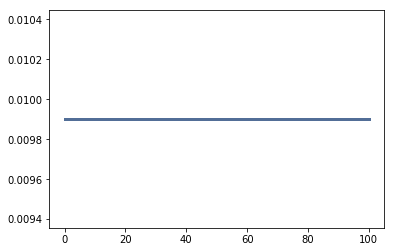

In [177]:
# Initialize the value of y which represents reliability of measurement.
y =0.7
prior = range(0,101)
suite = UnreliableCoin(prior, y)
thinkplot.Pdf(suite)

At y=0.7 posterior equals prior, no information is obtained!

In [178]:
suite 

UnreliableCoin({0: 0.009900990099009901, 1: 0.009900990099009901, 2: 0.009900990099009901, 3: 0.009900990099009901, 4: 0.009900990099009901, 5: 0.009900990099009901, 6: 0.009900990099009901, 7: 0.009900990099009901, 8: 0.009900990099009901, 9: 0.009900990099009901, 10: 0.009900990099009901, 11: 0.009900990099009901, 12: 0.009900990099009901, 13: 0.009900990099009901, 14: 0.009900990099009901, 15: 0.009900990099009901, 16: 0.009900990099009901, 17: 0.009900990099009901, 18: 0.009900990099009901, 19: 0.009900990099009901, 20: 0.009900990099009901, 21: 0.009900990099009901, 22: 0.009900990099009901, 23: 0.009900990099009901, 24: 0.009900990099009901, 25: 0.009900990099009901, 26: 0.009900990099009901, 27: 0.009900990099009901, 28: 0.009900990099009901, 29: 0.009900990099009901, 30: 0.009900990099009901, 31: 0.009900990099009901, 32: 0.009900990099009901, 33: 0.009900990099009901, 34: 0.009900990099009901, 35: 0.009900990099009901, 36: 0.009900990099009901, 37: 0.009900990099009901, 38: 0.

Let's update the suite with 5 heads and 8 tails...

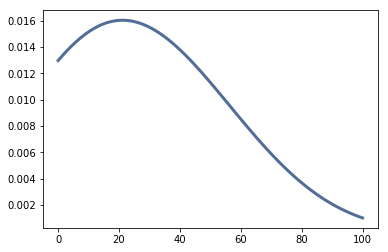

In [179]:
for ht in 'HHHHHTTTTTTTT':
    suite.Update(ht)
    
thinkplot.Pdf(suite)

The posterior distribution looks something like the above plot.

In [170]:
suite

UnreliableCoin({0: 0.01298293868506456, 1: 0.013250255333983007, 2: 0.01350780400460077, 3: 0.01375507264264389, 4: 0.013991576107979818, 5: 0.014216857343156426, 6: 0.014430488428397422, 7: 0.014632071522074491, 8: 0.014821239686115699, 9: 0.014997657596234108, 10: 0.01516102213727053, 11: 0.015311062884337211, 12: 0.015447542470827488, 13: 0.015570256844716244, 14: 0.015679035414919208, 15: 0.015773741089804075, 16: 0.01585427021025433, 17: 0.015920552379974633, 18: 0.01597255019599749, 19: 0.01601025888260264, 20: 0.01603370583209346, 21: 0.016042950056088686, 22: 0.016038081551184233, 23: 0.016019220583015394, 24: 0.015986516892909888, 25: 0.015940148831460808, 26: 0.015880322423471455, 27: 0.015807270368827966, 28: 0.015721250983942694, 29: 0.0156225470884795, 30: 0.01551146484212631, 31: 0.015388332536214805, 32: 0.015253499345008279, 33: 0.01510733404148226, 34: 0.014950223682412068, 35: 0.014782572267556174, 36: 0.014604799377684349, 37: 0.014417338796146786, 38: 0.014220637118

Let's implement the solution with different values of y and compare results.

In [171]:
def calculate(y):
    prior = range(0, 101)
    suite = UnreliableCoin(prior, y=y)
    for ht in 'HHHHHTTTTTTTT':
        suite.Update(ht)      
        
    thinkplot.Pdf(suite, label='y=%g' % y)

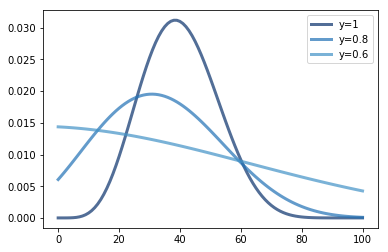

In [172]:
calculatePrior(1)
calculatePrior(0.8)
calculatePrior(0.6)
thinkplot.config(legend=True)

From the above plot we can observe that the posterior distribution gets wider as the measurement gets less reliable(value of y decreases). 


Let's check the distribution at y=0.5

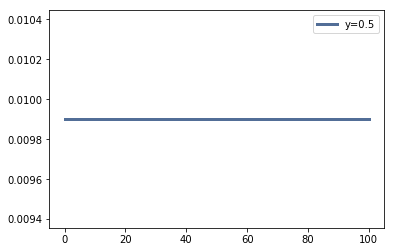

In [174]:
calculatePrior(0.5)
thinkplot.config(legend=True)

At y=0.5 posterior becomes equal to prior, hence no informtaion is obtained. Let's check what happens when the reliability of measurement(y) drops below 0.5.

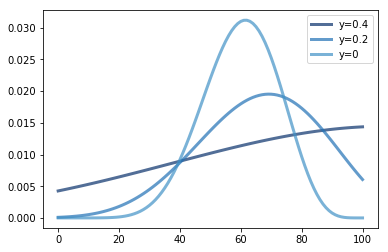

In [175]:
# Cases when the reliability of measurement drops below 0.5
calculatePrior(0.4)
calculatePrior(0.2)
calculatePrior(0.0)
thinkplot.config(legend=True)

Below 0.5, as the value of y drops from 0.4 to 0.2 to 0 the posterior distribution gets narrower again!!!

**Exercise 4.2.**


This exercise is inspired by a question posted by a “redditor” named dominosci on Reddit’s statistics “subreddit” at http: // reddit. com/ r/ statistics .

Reddit is an online forum with many interest groups called subreddits. Users, called redditors, post links to online content and other web pages. Other redditors vote on the links, giving an “upvote” to high-quality links and a “downvote” to links that are bad or irrelevant.

A problem, identified by dominosci, is that some redditors are more reliable than others, and Reddit does not take this into account.

The challenge is to devise a system so that when a redditor casts a vote, the estimated quality of the link is updated in accordance with the reliability of the redditor, and the estimated reliability of the redditor is updated in accordance with the quality of the link.
One approach is to model the quality of the link as the probability of garnering an upvote, and to model the reliability of the redditor as the probability of correctly giving an upvote to a high-quality item.

Write class definitions for redditors and links and an update function that updates both objects whenever a redditor casts a vote.

**Solution**

* Each link has quality q (the probability of eliciting an upvote from a completely reliable redditor). 
* Each user has a reliability r, which is the probability of giving an upvote to a link with q=1.
* The probability that a redditor with reliability r gives an upvote to a link with quality q is `r*q + (1-r) * (1-q)`

When a redditor votes on a item, we simultaneously update our belief about the redditor and the item.

In [200]:
"""
Class Redditor: Models the reliability of a redditor.
hypo: integer value of r, the prob of a correct vote (0-100).
data: (vote, q) pair, where vote is 'up' or 'down' and q is the mean quality of the link
"""

class Redditor(Suite):
    def Likelihood(self, data, hypo):
        r = hypo / 100.0
        vote, q = data

        if vote == 'up':
            return r * q + (1-r) * (1-q)
        elif vote == 'down':
            return r * (1-q) + (1-r) * q
        else:
            return 0

In [207]:
 """
 Class Link: Models the quality of an item(link).
 hypo: integer value of x, the prob of garnering an upvote.
 data: (vote, r) pair, where vote is 'up' or 'down' and r is the mean reliability of the redditor
 """

class Link(Suite):
    def Likelihood(self, data, hypo):
        x = hypo / 100.0
        vote, r = data

        if vote == 'up':
            return x * r + (1-x) * (1-r)
        elif vote == 'down':
            return x * (1-r) + (1-x) * r
        else:
            return 0

Let's start with a redittor who has demonstrated some reliability.

In [208]:
redditor = Redditor(label='redditor')
beta = Beta(2, 1)
for val, prob in beta.MakePmf().Items():
    redditor.Set(val*100, prob)

0.6699999999999996

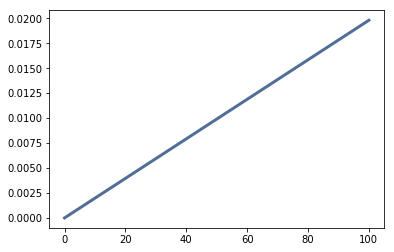

In [209]:
thinkplot.Pdf(redditor)
mean_r = redditor.Mean() / 100.0
mean_r

0.5000000000000001

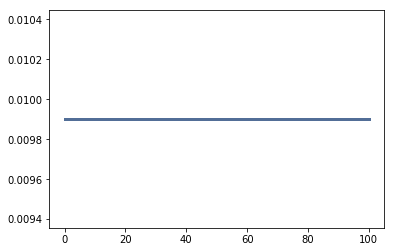

In [210]:
item = Link(range(0, 101), label='link')

thinkplot.Pdf(item)
mean_q = item.Mean() / 100.0
mean_q

Lets's update the priors each with mean value of other!!!

In [211]:
#Update redittor with mean quality of link
redditor.Update(('up', mean_q))
#Update link with mean reliability of redditor
item.Update(('up', mean_r))

0.4999999999999999

In [212]:
item.Mean() 

55.78000000000002

So, after the upvote the mean quality of link increases to 55.78%.

### Discussion:

The above exercises provided a good undertanding of the bayesian estimation for the following:
* update in the belief in the system and how it effects posterior probabilities in sampling with and without replacement cases.
* how to write likelihood functions to accomodate multiple hypothesis.
* how posterior distribution changes with the reliability of measurement of an outcome.